# Movie Correlation Project
## In this project, we are going to find the variables that has the biggest impact in a film's gross revenue with Correlation.
- There are many factors on how a movie can be a generational hit, where it has a long lasting effect on the audience but little do we know what variable makes it so.
- That's why in this Project, we're using **Correlation** to find what variable has the strongest relationship with the `gross income of the movies` ranging from 1980-2020.
- We all want to know what is the greatest contributor to a great film's revenue.

## Importing Python libraries

First and foremost, we import the libraries we'll be using for this project:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
plt.style.use("ggplot")
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12, 8)

Then we pull the dataset we'll be using. I got this dataset from **Kaggle** called `Movie Industry`. It is a DataFrame of every movie from 1980-2020, complete with the values for it's *rating, genre, year it was released, movie score, audience votes, director, writer, star actor, country, budget, gross, company and it's total runtime*.
- https://www.kaggle.com/datasets/danielgrijalvas/movies

## Data Cleaning

In this cell, we did some Data Cleaning. Starting by removing duplicate rows, dropping rows with NaN values, correcting the `year` column as the original DataFrame was not parallel to the `released` column and lastly changing the datatypes of some columns.

In [2]:
df = pd.read_csv('C:/Users/Gerard/Desktop/documents/movies.csv')
df.dropna(inplace=True)
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0


In [3]:
df.shape

(5421, 15)

In [4]:
null_counts = df.isnull().sum()
null_counts

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [5]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [6]:
df.nunique()

name        5336
rating        10
genre         15
year          41
released    2560
score         72
votes        717
director    2063
writer      3205
star        1845
country       50
budget       398
gross       5418
company     1475
runtime      127
dtype: int64

In [7]:
df.drop_duplicates(subset=['name', 'year', 'released'], inplace=True)
df['released'] = df['released'].str.replace(r'\s*\(.*\)', '', regex=True)
df['released'] = pd.to_datetime(df['released'], format='mixed')
df.drop('year', axis=1, inplace=True)
df.insert(loc=3, column="year", value=df["released"].astype(str).str[:4])
columns_to_process = ['budget', 'votes', 'runtime']
for col in columns_to_process:
    df[col] = df[col].fillna(0)
    df[col] = df[col].astype(int)
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,2020-01-17,6.6,140000,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244.0,Columbia Pictures,124
7649,Sonic the Hedgehog,PG,Action,2020,2020-02-14,6.5,102000,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683.0,Paramount Pictures,99
7650,Dolittle,PG,Adventure,2020,2020-01-17,5.6,53000,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753.0,Universal Pictures,101
7651,The Call of the Wild,PG,Adventure,2020,2020-02-21,6.8,42000,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497.0,20th Century Studios,100


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   name      5421 non-null   object        
 1   rating    5421 non-null   object        
 2   genre     5421 non-null   object        
 3   year      5421 non-null   object        
 4   released  5421 non-null   datetime64[ns]
 5   score     5421 non-null   float64       
 6   votes     5421 non-null   int32         
 7   director  5421 non-null   object        
 8   writer    5421 non-null   object        
 9   star      5421 non-null   object        
 10  country   5421 non-null   object        
 11  budget    5421 non-null   int32         
 12  gross     5421 non-null   float64       
 13  company   5421 non-null   object        
 14  runtime   5421 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(3), object(9)
memory usage: 614.1+ KB


### Quick note: 
- the `gross` column was not included in the conversion to integer as some rows we're corrupted. Whenever the column was being converted to integer, 3 movies(**'Avatar'**, **'Avengers: Endgame'**, **'Titanic'**) had their values returned as negative. I tried overwriting them manually but all Pandas does was create another row of the same movies but have NaN values in other columns except for the `gross` column. The only option I had was to leave the gross column as a floating type object. It would be hard to just remove these 3 rows as they are one of the highest earning movies in the past 3 decades.

In [9]:
df1 = df.sort_values('gross', ascending=False)
df1

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2.847246e+09,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2.797501e+09,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2.201647e+09,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2.069522e+09,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2.048360e+09,Marvel Studios,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2015,2015-01-15,5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5.073000e+03,Two Prong Lesson,96
2434,Philadelphia Experiment II,PG-13,Action,1994,1994-06-04,4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2.970000e+03,Trimark Pictures,97
3681,Ginger Snaps,Not Rated,Drama,2001,2001-05-11,6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2.554000e+03,Copperheart Entertainment,108
272,Parasite,R,Horror,1982,1982-03-12,3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2.270000e+03,Embassy Pictures,85


## Plots

With the Data being cleaned and set, now we can start by checking the Correlation between the budget and gross columns with a `scatterplot`.

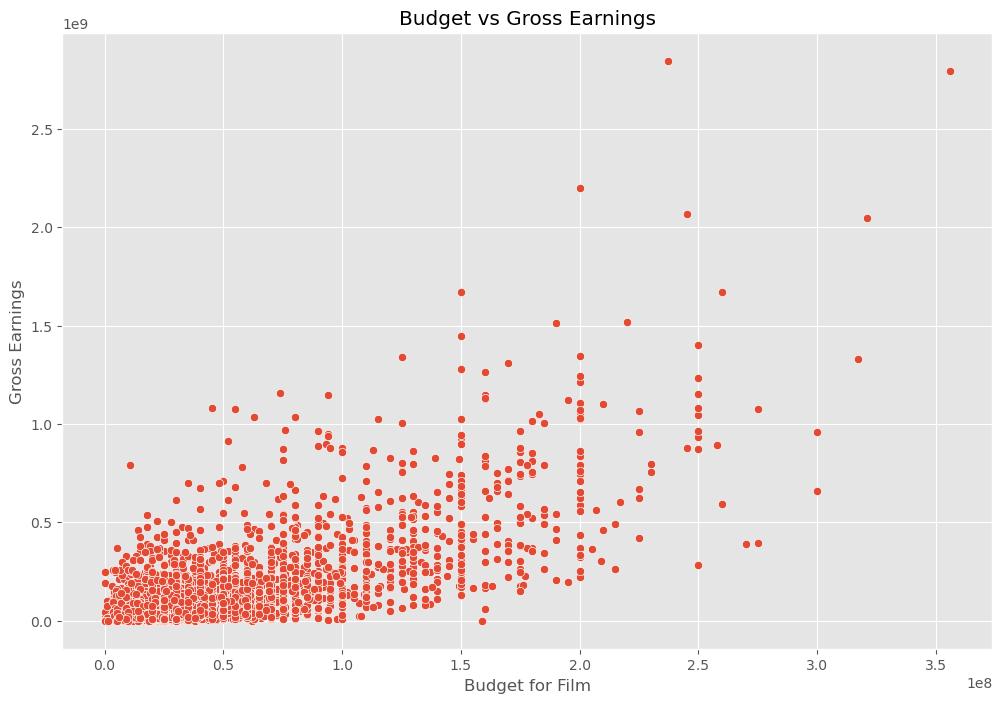

In [10]:
sns.scatterplot(data=df, x='budget', y='gross')
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()

Our scatterplot with a regression line to indicate how strong or weak the relationship is.

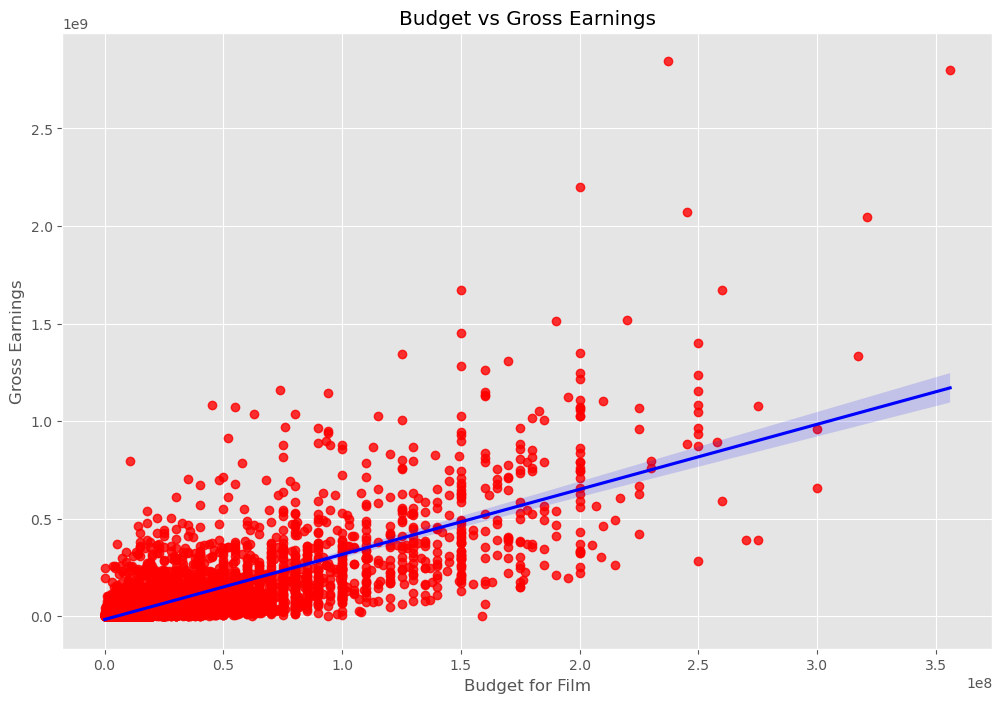

In [11]:
sns.regplot(data=df, x='budget', y='gross', scatter_kws={'color': 'red'}, line_kws={'color':'blue'})
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()

As you can see, there's a `positive relationship` between the budget of a film and the gross revenue, however the correlation is `weak` as the data points are scattered along the regression line. However, you might notice some data points are so far apart from the majority, they are the rare occurences of high budgeted movies with high gross revenue.

By invoking the `sort_values` method, we sorted the gross and budget column from highest to lowest to confirm whether the case is true for the Plots above. With the top 5 having high budget resulting in exceeding values in revenue, we can confirm that budget is a big factor for high gross income in a movie.

In [12]:
df.sort_values('gross', ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2.847246e+09,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2.797501e+09,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2.201647e+09,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2.069522e+09,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2.048360e+09,Marvel Studios,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2015,2015-01-15,5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5.073000e+03,Two Prong Lesson,96
2434,Philadelphia Experiment II,PG-13,Action,1994,1994-06-04,4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2.970000e+03,Trimark Pictures,97
3681,Ginger Snaps,Not Rated,Drama,2001,2001-05-11,6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2.554000e+03,Copperheart Entertainment,108
272,Parasite,R,Horror,1982,1982-03-12,3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2.270000e+03,Embassy Pictures,85


In [13]:
df.sort_values('budget', ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2.797501e+09,Marvel Studios,181
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2.048360e+09,Marvel Studios,149
7075,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,2017,2017-12-15,7.0,581000,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000,1.332699e+09,Walt Disney Pictures,152
7066,Justice League,PG-13,Action,2017,2017-11-17,6.1,418000,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000,6.579270e+08,Warner Bros.,120
5060,Pirates of the Caribbean: at World's End,PG-13,Action,2007,2007-05-25,7.1,608000,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000,9.609965e+08,Walt Disney Pictures,169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,The Living End,Unrated,Comedy,1992,1992-08-21,6.5,2900,Gregg Araki,Gregg Araki,Mike Dytri,United States,22769,6.925850e+05,Desperate Pictures,81
5114,Paranormal Activity,R,Horror,2009,2009-10-16,6.3,225000,Oren Peli,Oren Peli,Katie Featherston,United States,15000,1.933558e+08,Solana Films,86
2093,El Mariachi,R,Action,1993,1993-02-26,6.9,64000,Robert Rodriguez,Robert Rodriguez,Carlos Gallardo,Mexico,7000,2.040920e+06,Columbia Pictures,81
4507,Primer,PG-13,Drama,2005,2005-05-27,6.9,101000,Shane Carruth,Shane Carruth,Shane Carruth,United States,7000,5.454360e+05,ERBP,77


## Correlation Matrix and Heatmap

Now we take a look at the correlation of the other columns with gross by invoking the `corr` method. this allows us to transform the dataframe into a *correlation matrix*, where it behaves like a Punnett Square, pairing columns from the y-axis to the x-axis in the form of cells. As you can see in the parameters, we passed the argument of `pearson` in the method parameter as it deals with measuring relationships in linear form as this method is easier to use and to understand.

In [14]:
df.corr(numeric_only=True, method='pearson')

,score,votes,budget,gross,runtime
score,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.414068,0.352303,0.318695,0.275796,1.000000


With our correlation matrix set, we can transform it into a `heatmap` to visualize it to be readable and more self-explanatory in each pairing cases.

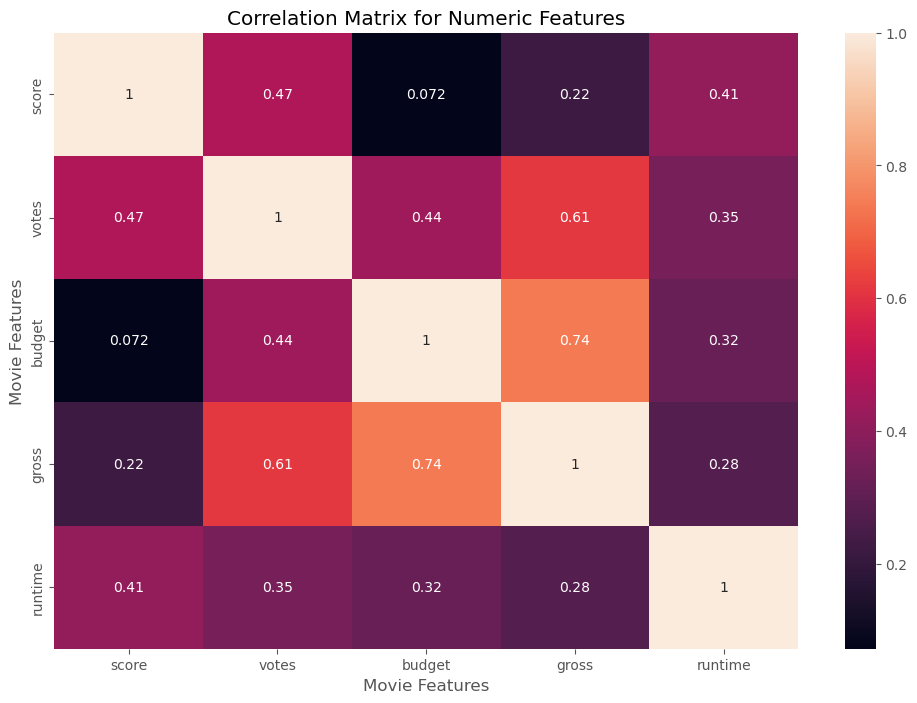

In [15]:
correlation_matrix = df.corr(numeric_only=True, method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

As you can see we are missing some columns due to the fact that the `df.corr` method only works for numeric object columns. Columns such as *country*, *company*, *director*, *genre*, *rating* and *name* are `string based objects` which comprises of `letters`. We also want to look at the correlation of gross income with specific string based columns such as company as the company handling a film can also be a big factor for a successful production.

In [16]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772.0,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106.0,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067.0,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539.0,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344.0,Orion Pictures,98


In order to convert string based object columns to unique numeric values, we used a `for` loop to tell Pandas to change every column datatype that is a `string object` into a `category`. A category is a datatype that gives a unique value a specific numeric representation, for example, in the company column, every occurence of Warner Bros, if changed to a `category` object, will be given the numeric representation of 1426. However, this code will not yet display every value in the company column as a numeric value, that's where we use the `cat.codes` attribute, this attribute returns a visual numerical representation to the dataframe of each `category` object in categorical data. 

In [17]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4692,6,6,0,1980-06-13,8.4,927000,1795,2832,699,46,19000000,46998772.0,1426,146
1,3929,6,1,0,1980-07-02,5.8,65000,1578,1158,214,47,4500000,58853106.0,452,104
2,3641,4,0,0,1980-06-20,8.7,1200000,757,1818,1157,47,18000000,538375067.0,945,124
3,204,4,4,0,1980-07-02,7.7,221000,889,1413,1474,47,3500000,83453539.0,1108,88
4,732,6,4,0,1980-07-25,7.3,108000,719,351,271,47,6000000,39846344.0,1083,98


In [18]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4692,6,6,0,1980-06-13,8.4,927000,1795,2832,699,46,19000000,46998772.0,1426,146
1,3929,6,1,0,1980-07-02,5.8,65000,1578,1158,214,47,4500000,58853106.0,452,104
2,3641,4,0,0,1980-06-20,8.7,1200000,757,1818,1157,47,18000000,538375067.0,945,124
3,204,4,4,0,1980-07-02,7.7,221000,889,1413,1474,47,3500000,83453539.0,1108,88
4,732,6,4,0,1980-07-25,7.3,108000,719,351,271,47,6000000,39846344.0,1083,98


Now that we've transformed all our DataFrame values into their numeric representation, we can apply the **Correlation Matrix** to every column.

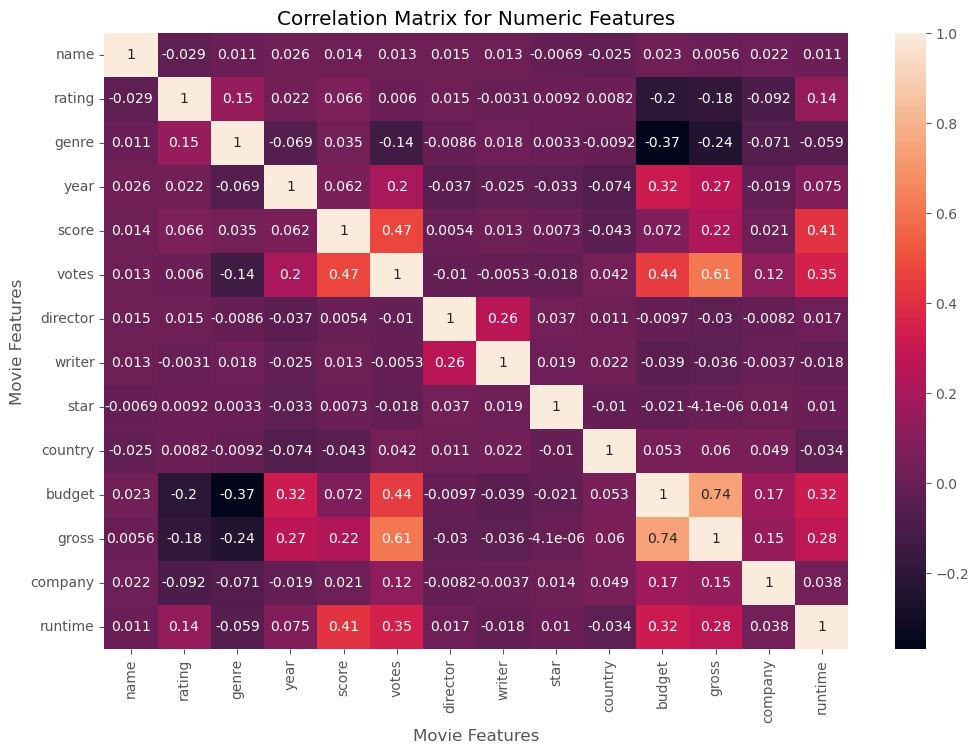

In [19]:
correlation_matrix = df_numerized.corr(numeric_only=True, method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

This will be the result.

## Unstacking and Finding the Highest Correlations for gross revenue

In [20]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.029234,0.010996,0.025542,0.026208,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850
rating,-0.029234,1.000000,0.147796,0.022021,0.020835,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792
genre,0.010996,0.147796,1.000000,-0.069147,-0.068880,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237
year,0.025542,0.022021,-0.069147,1.000000,0.999623,0.061923,0.203098,-0.037371,-0.025495,-0.032687,-0.073569,0.320312,0.268721,-0.018806,0.075294
released,0.026208,0.020835,-0.068880,0.999623,1.000000,0.063322,0.204779,-0.037648,-0.025679,-0.032269,-0.073147,0.322291,0.270432,-0.018384,0.077406
score,0.014450,0.065983,0.035106,0.061923,0.063322,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068
votes,0.012615,0.006031,-0.135990,0.203098,0.204779,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303
director,0.015246,0.014656,-0.008553,-0.037371,-0.037648,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433
writer,0.012880,-0.003149,0.017578,-0.025495,-0.025679,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561
star,-0.006882,0.009196,0.003341,-0.032687,-0.032269,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108


With all the data we have, we can create a Series of pairing for each column variables with the `.unstack` method. This will transform the DataFrame into a Series that pairs them in a vertical manner.

In [21]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()
corr_pairs.head(50)

name    name        1.000000
        rating     -0.029234
        genre       0.010996
        year        0.025542
        released    0.026208
        score       0.014450
        votes       0.012615
        director    0.015246
        writer      0.012880
        star       -0.006882
        country    -0.025490
        budget      0.023392
        gross       0.005639
        company     0.021697
        runtime     0.010850
rating  name       -0.029234
        rating      1.000000
        genre       0.147796
        year        0.022021
        released    0.020835
        score       0.065983
        votes       0.006031
        director    0.014656
        writer     -0.003149
        star        0.009196
        country     0.008230
        budget     -0.203946
        gross      -0.181906
        company    -0.092357
        runtime     0.140792
genre   name        0.010996
        rating      0.147796
        genre       1.000000
        year       -0.069147
        releas

With the `sort_values` method, we can reorganize them to pair randomly.

In [22]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs.head()

genre   budget   -0.368523
budget  genre    -0.368523
genre   gross    -0.244101
gross   genre    -0.244101
budget  rating   -0.203946
dtype: float64

What we want to do now with our correlation data, we want to get the top variables that has the biggest impact in gross revenue. Since we have all correlation values now, we can add a condition of pulling only the correlated pairs that have a correlation higher than `0.5`, which indicates high correlation.

With our findings, it seems that Budget and Votes have the highest correlation for gross revenue. 

In [37]:
gross_pairs = sorted_pairs[sorted_pairs.index.get_level_values(0) == 'gross']

In [38]:
high_correlation = gross_pairs[(gross_pairs) > 0.5]
high_correlation.head()

gross  votes     0.614751
       budget    0.740247
       gross     1.000000
dtype: float64

In [41]:
low_correlation = gross_pairs[(gross_pairs) < 0.5]
low_correlation

gross  genre      -0.244101
       rating     -0.181906
       writer     -0.035885
       director   -0.029560
       star       -0.000004
       name        0.005639
       country     0.060078
       company     0.149553
       score       0.222556
       year        0.268721
       released    0.270432
       runtime     0.275796
dtype: float64

#### With that said, the biggest impact for a movie to be high earning would be the budget and the votes they receive from the audience.